# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()

# Use json.dumps with argument indent=4 to format data
print(json.dumps(btc_data, indent=4))

print(btc_data["data"]["1"]["quotes"]["USD"]["price"])

# Fetch current ETH price
response_eth_data = requests.get(eth_url)

eth_data = response_eth_data.json()
print(json.dumps(eth_data, indent=4))

print(eth_data["data"]["1027"]["quotes"]["USD"]["price"])

# Compute current value of my crpto
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18989581,
            "total_supply": 18989581,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41187.0,
                    "volume_24h": 18676406554,
                    "market_cap": 781754599421,
                    "percentage_change_1h": -0.248526428295368,
                    "percentage_change_24h": -1.5426853161631,
                    "percentage_change_7d": 8.80948870100978,
                    "percent_change_1h": -0.248526428295368,
                    "percent_change_24h": -1.5426853161631,
                    "percent_change_7d": 8.80948870100978
                },
                "CAD": {
                    "price": 51866.7891,
                    "volume_24h": 23519198773.4522,
                    "

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [6]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

alpaca

In [7]:
# Format current date as ISO format
# end= pd.Timestamp.today(tz="America/Chicago").isoformat()
# start = datetime.now() + timedelta(days=-1000)
# start = pd.Timestamp(end,tz="America/Chicago").isoformat()
start = pd.Timestamp("2022-03-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-03-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day" 

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start,
    end
).df

# Preview DataFrame
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-01 05:00:00+00:00,110.600,111.1700,110.5700,110.82,14248500,39215,110.836369,AGG
2022-03-02 05:00:00+00:00,110.310,110.3800,109.4600,109.49,8489288,27605,109.930996,AGG
2022-03-03 05:00:00+00:00,109.785,110.0000,109.6500,109.86,15479351,47775,109.822045,AGG
2022-03-04 05:00:00+00:00,110.380,110.5500,110.2250,110.30,8116629,26863,110.381556,AGG
2022-03-07 05:00:00+00:00,109.850,110.1400,109.6400,109.66,12474681,35203,109.871205,AGG
2022-03-08 05:00:00+00:00,109.230,109.3301,109.1201,109.27,8639904,25293,109.234523,AGG
2022-03-09 05:00:00+00:00,109.090,109.2090,108.9300,109.04,9873754,29005,109.058720,AGG
2022-03-10 05:00:00+00:00,108.650,108.6800,108.2500,108.43,13646915,42329,108.417461,AGG
2022-03-11 05:00:00+00:00,108.440,108.5500,108.3400,108.41,10662625,29475,108.421874,AGG


In [8]:
# Pick AGG and SPY close prices
spy_bars = df_portfolio.loc[df_portfolio["symbol"] == "SPY"]
agg_bars = df_portfolio.loc[df_portfolio["symbol"] == "AGG"]

spy_close_price = spy_bars.tail(1).close.values
agg_close_price = agg_bars.tail(1).close.values

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $[108.1]
Current SPY closing price: $[444.52]


In [11]:
# Compute the current value of shares
my_spy_value = float(my_spy * spy_close_price)
my_agg_value = float(my_agg * agg_close_price)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

# Consolidate financial assets data
assets_data = {
    "amount": [total_crypto_value, total_shares_value]
}

# Set the tickers
tickers = ["Crypto", "Shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(assets_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,64690.308
Shares,43846.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

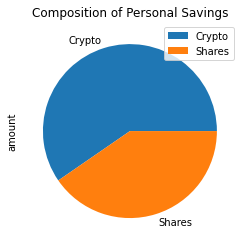

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
##print(emergency_fund)

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value
##print(total_savings)

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulating the person for having enough money in this fund")
elif (total_savings == emergency_fund):
    print("congratulating the person on reaching this financial goal")
else: 
    deficit = emergency_fund - total_savings
    print(f"You are ${deficit} away the person is from reaching the goal")

Congratulating the person for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [35]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day" 

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
).df

# Preview DataFrame
df_stock_data

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [36]:
spy_bars = df_stock_data.loc[df_portfolio["symbol"] == "SPY"]
agg_bars = df_stock_data.loc[df_portfolio["symbol"] == "AGG"]

df_stock_data = pd.concat([spy_bars, agg_bars], axis = 1, keys=(["SPY","AGG"]))

In [37]:
df_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.53  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.96  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                             AGG            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2016-05-02 04:00:00+00:00      263580  207.294812    SPY  110.74  110.7400   
2016-05-03 04:00:00+00:00      377518  206.312060    SPY  110.89  110.9450   
2016-05-04 04:00:00+00:00      345261  205.090172    SPY  110.91  110.9315   
2016-05-05 04:00:00+00:00      280622  205.141555    SPY  110.92  111.1600   
2016-05-06 04:00:00+00:00      340335  204.937074    SPY  111.12  111.1200   

                                                                               \
                                low    close   volume trade_count        vwap   
timestamp                                                                       
2016-05-02 04:00:00+00:00  110.5200  110.605  3553939       15119  110.627199   
2016-05-03 04:00:00+00:00  110.7500  110.810  3044940       15662  110.865995   
2016-05-04 04:00:00+00:00  110.7595  110.860  2920608       13982  110.879063   
2016-05-05 04:00:00+00:00  110.8010  111.140  3008142       15707  111.028363   
2016-05-06 04:00:00+00:00  110.9700  110.970  2718710       12697  111.031967   

                                  
                          symbol  
timestamp                         
2016-05-02 04:00:00+00:00    AGG  
2016-05-03 04:00:00+00:00    AGG  
2016-05-04 04:00:00+00:00    AGG  
2016-05-05 04:00:00+00:00    AGG  
2016-05-06 04:00:00+00:00    AGG

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.53  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.96  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                          AGG  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812    SPY          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    SPY    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    SPY    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    SPY    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074    SPY     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2016-05-02 04:00:00+00:00  110.627199    AGG          NaN  
2016-05-03 04:00:00+00:00  110.865995    AGG     0.001853  
2016-05-04 04:00:00+00:00  110.879063    AGG     0.000451  
2016-05-05 04:00:00+00:00  111.028363    AGG     0.002526  
2016-05-06 04:00:00+00:00  111.031967    AGG    -0.001530

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patriciarajamanickam/FinTech/HomeWork/finance_planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004145,0.999870,1.009822,0.993576,1.004420,0.997121,1.004757,1.005001,1.004576,0.999570,...,0.994869,1.002541,1.003693,1.002501,1.007333,1.001241,0.997255,1.004374,0.994026,0.990628
2,1.011010,0.991407,1.008199,0.993450,1.007345,0.988945,1.019088,1.009450,0.997854,1.000501,...,0.990787,0.995161,0.998497,0.998343,1.014153,0.994659,0.981886,1.003197,1.005257,0.996242
3,1.010898,0.989874,1.003560,1.006774,1.001664,0.992171,1.011663,1.006014,1.003508,0.991848,...,0.990433,0.995283,1.002224,0.995147,1.016921,1.014550,0.989527,1.013887,1.008510,1.007632
4,1.020753,0.988677,0.999107,1.003752,0.995901,0.991022,1.007507,0.998580,1.011185,0.989734,...,0.989382,1.001309,0.995408,0.987285,1.031008,1.005924,0.980709,1.024188,1.000215,1.000753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.563060,11.788302,16.927568,3.990116,24.136714,16.491693,11.928134,6.070069,19.472155,12.392415,...,22.631709,50.367510,10.632283,35.190394,12.775159,11.433375,11.408494,9.013884,18.513173,11.793224
7557,4.583773,11.834879,17.149338,3.970265,23.783924,16.556675,12.033290,6.104449,19.420188,12.391176,...,22.700894,50.935843,10.657492,35.305082,12.822545,11.410160,11.520614,9.001904,18.657994,11.657047
7558,4.601456,11.883726,17.226587,3.959404,23.619028,16.539870,11.916421,6.144125,19.380851,12.378006,...,22.481607,51.193827,10.581395,35.357244,12.912493,11.386384,11.383784,9.065372,18.682235,11.458304
7559,4.604296,11.888028,17.129400,3.955489,23.476148,16.547255,11.912006,6.143948,19.456603,12.289634,...,22.387480,51.367165,10.617395,35.318822,12.815673,11.378774,11.381154,9.039856,18.592183,11.352734


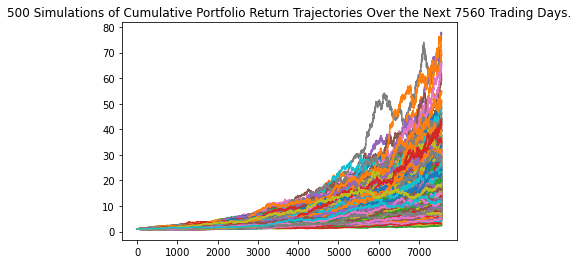

In [40]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

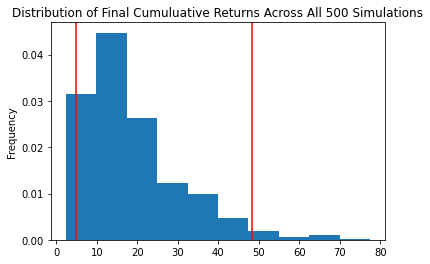

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             18.775765
std              11.961155
min               2.341098
25%              10.170231
50%              15.743353
75%              23.613968
max              77.452407
95% CI Lower      4.855013
95% CI Upper     48.335786
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97100.25 and $966715.72


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145650.38 and $1450073.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")